# Human Activity Recognition (HAR) Project

In this project, I will apply unsupervised clustering algorithms such as K-Means and DBSCAN to group and identify patterns in various human activities, including walking, laying, and more.

In [38]:
# import libraries

import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from mpl_toolkits.mplot3d import Axes3D

In [39]:
# read in the data

# delimiter is whitespace, which seperates out the data into different columns
train_data = pd.read_csv("X_train.txt", delim_whitespace=True, header=None)

/var/folders/3q/n4wfzzkj7hs7ycr0j7cv_cr00000gp/T/ipykernel_93474/697300180.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv("X_train.txt", delim_whitespace=True, header=None)


In [40]:
train_data.head() # has 561 columns

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


Has too many columns, need to perform dimensionality reduction (PCA)

Re-scale the data just in case (data looks scaled, but re-scaling makes sure there are no problems later

In [41]:
# performing scaling with standard scaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data) # scale the data such that mean = 0, std. dev = 1

In [42]:
# perform PCA

pca = PCA(n_components=0.95) 
#n_components = specify # of components (pass in integer) OR find the # of components such that 
# a certain percentage of data's variance is maintained (95% of variance in this case)

print("Original shape: ",X_scaled.shape)
X_pca = pca.fit_transform(X_scaled)
print("Reduced shape:", X_pca.shape)

Original shape:  (7352, 561)
Reduced shape: (7352, 102)


pass in data to machine learning models

In [43]:
# K-Means Clustering

# there are 6 different activity states, so 6 clusters 
kmeans = KMeans(n_clusters=6, random_state=42) # do K_means on 102D
k_means_clusters = kmeans.fit_predict(X_pca) # predict based on reduced data by PCA

Unique cluster labels: [0 1 2 3 4 5]


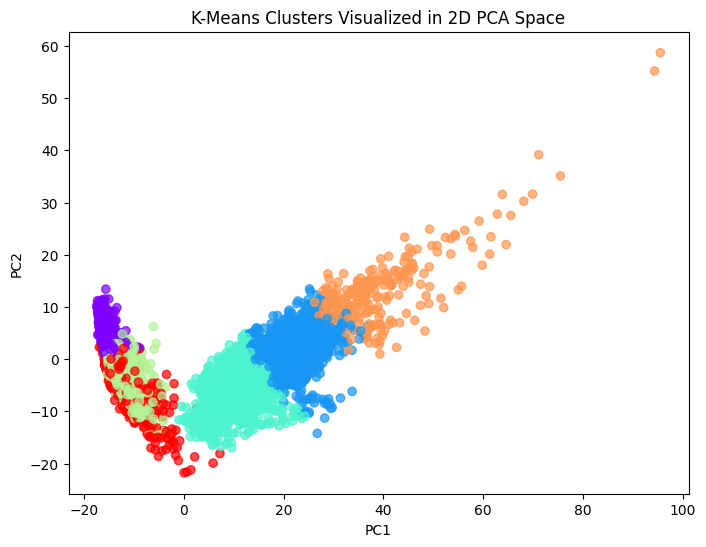

In [44]:
# visualize the K-Means clusters

pca_2d = PCA(n_components=2) # reduce 102D to 2D for visualization
X_pca_2d = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca_2d[:, 0], X_pca_2d[:, 1],
    c=k_means_clusters, cmap='rainbow', alpha=0.7
)

print("Unique cluster labels:", np.unique(k_means_clusters))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clusters Visualized in 2D PCA Space")
plt.show()

In [45]:
# DBSCAN Clustering

# do PCA 
pca_dbscan = PCA(n_components=10)
X_dbscan = pca_dbscan.fit_transform(X_scaled)
dbscan_clusters = dbscan.fit_predict(X_dbscan)


In [46]:
# do DBSCAN on 10D data

dbscan = DBSCAN(eps=6, min_samples=7)
dbscan_clusters = dbscan.fit_predict(X_dbscan)

print("Unique cluster labels:", np.unique(dbscan_clusters))

Unique cluster labels: [-1  0  1  2  3  4]


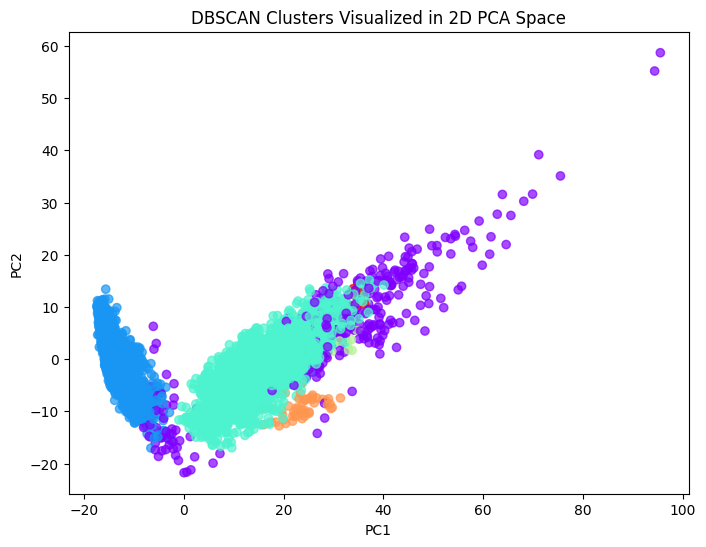

In [47]:
# visualize DBSCAN clusters

# 2D PCA for plotting
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot DBSCAN clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=dbscan_clusters, cmap='rainbow', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Clusters Visualized in 2D PCA Space")
plt.show()

DBSCAN seems to find cluster it better because DBSCAN is stronger when locating outliers compared to K-Means. However, K-Means ultimately performs better for this dataset because it assigns every point to a cluster. This avoids leaving points unclassified as 'noise', resulting in more balanced and complete clusters that are more practical for grouping human activity data.

In [48]:
# Load activity labels (result [1-6] for each data point)

y_true = pd.read_csv("y_train.txt", header=None, delim_whitespace=True)
y_true = y_true[0]  # Make it a 1D Series
print(y_true.value_counts())

0
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


/var/folders/3q/n4wfzzkj7hs7ycr0j7cv_cr00000gp/T/ipykernel_93474/2622498603.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_true = pd.read_csv("y_train.txt", header=None, delim_whitespace=True)


Let's do PCA in 3D

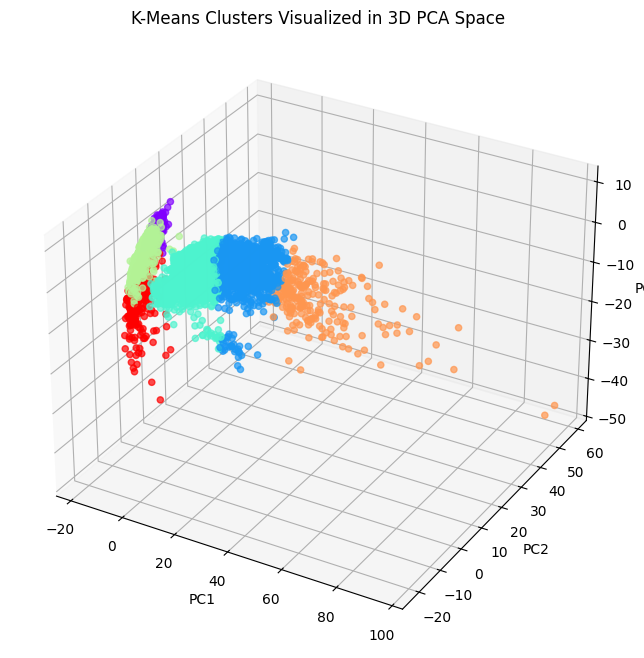

In [49]:
# plot K-Means Clusters in 3D

K_means_pca_3d = PCA(n_components=3)
K_means_X_pca_3d = K_means_pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    K_means_X_pca_3d[:, 0], K_means_X_pca_3d[:, 1], K_means_X_pca_3d[:, 2],
    c=k_means_clusters, cmap='rainbow', alpha=0.7
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('K-Means Clusters Visualized in 3D PCA Space')
plt.show()

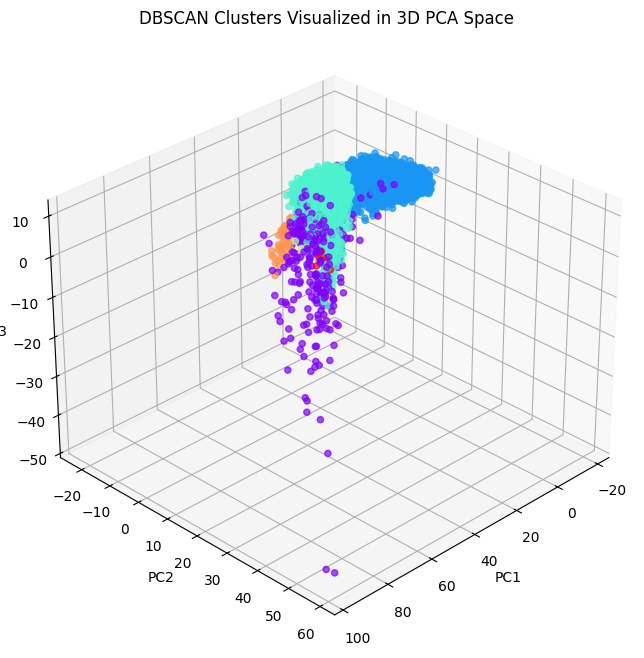

In [50]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=dbscan_clusters, cmap='rainbow', alpha=0.7
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN Clusters Visualized in 3D PCA Space')

# Optional static view
ax.view_init(elev=30, azim=45)

plt.show()

In [51]:
# silhouette scores for K-Means

# Original space (102D)
score_kmeans_full = silhouette_score(X_pca, k_means_clusters)
print(f"K-Means Silhouette Score (102D): {score_kmeans_full:.3f}")

# 2D PCA projection
score_kmeans_2d = silhouette_score(X_pca_2d, k_means_clusters)
print(f"K-Means Silhouette Score (2D): {score_kmeans_2d:.3f}")

# 3D PCA projection
score_kmeans_3d = silhouette_score(X_pca_3d, k_means_clusters)
print(f"K-Means Silhouette Score (3D): {score_kmeans_3d:.3f}")

K-Means Silhouette Score (102D): 0.121
K-Means Silhouette Score (2D): 0.374
K-Means Silhouette Score (3D): 0.371


In [52]:
# silhouette scores for DBSCAN

# Original space (10D)
score_dbscan_full = silhouette_score(X_dbscan, dbscan_clusters)
print(f"DBSCAN Silhouette Score (10D): {score_dbscan_full:.3f}")

# 2D PCA projection
score_dbscan_2d = silhouette_score(X_pca_2d, dbscan_clusters)
print(f"DBSCAN Silhouette Score (2D): {score_dbscan_2d:.3f}")

# 3D PCA projection
score_dbscan_3d = silhouette_score(X_pca_3d, dbscan_clusters)
print(f"DBSCAN Silhouette Score (3D): {score_dbscan_3d:.3f}")

DBSCAN Silhouette Score (10D): 0.449
DBSCAN Silhouette Score (2D): 0.464
DBSCAN Silhouette Score (3D): 0.507


ARI (Adjusted Rand Index) evaluates how closely the clusters match the true activity labels by comparing which points are grouped together or apart. A higher ARI means better clustering.

In [53]:
# calculating ARI

# K-Means ARI
ari_kmeans = adjusted_rand_score(y_true, k_means_clusters)
print(f"K-Means ARI: {ari_kmeans:.3f}")

# DBSCAN ARI
ari_dbscan = adjusted_rand_score(y_true, dbscan_clusters)
print(f"DBSCAN ARI: {ari_dbscan:.3f}")

K-Means ARI: 0.328
DBSCAN ARI: 0.325
